In [1]:
import scipy.io as spio


mat = spio.loadmat('TrainingData.mat', squeeze_me=True)

recSignal = mat['modelInput'] 
modelLLR = mat['modelOutput']

n = len(recSignal)

#Training data
recSignal_train = recSignal[0:100000]
recSignal_test = recSignal[100001:(n-1)]

#test data
modelLLR_train = modelLLR[0:100000]
modelLLR_test = modelLLR[100001:(n-1)]




In [60]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 10 07:33:07 2020

@author: fl27895
"""

# QPSK LLR training
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense





model = Sequential()
model.add(Dense(12, input_dim = 2, activation = "relu"))
model.add(Dense(24, activation = "relu"))
model.add(Dense(24, activation = "tanh"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(4,activation = 'linear'))
model.compile(loss="mse", optimizer = "adam", metrics = ['accuracy'])


import tensorflow as tf
from tensorflow.keras import callbacks
import numpy as np
import matplotlib.pyplot as plt

model.fit(recSignal_train, modelLLR_train, epochs=6, batch_size=2)


print("done")



Train on 100000 samples
Epoch 1/6
100000/100000 [==============================] - 144s 1ms/sample - loss: 1.7855e-04 - accuracy: 0.9305
Epoch 2/6
100000/100000 [==============================] - 105s 1ms/sample - loss: 6.5370e-06 - accuracy: 0.9767
Epoch 3/6
100000/100000 [==============================] - 124s 1ms/sample - loss: 4.6708e-06 - accuracy: 0.9802
Epoch 4/6
100000/100000 [==============================] - 121s 1ms/sample - loss: 4.0147e-06 - accuracy: 0.9812
Epoch 5/6
100000/100000 [==============================] - 116s 1ms/sample - loss: 3.4488e-06 - accuracy: 0.9823
Epoch 6/6
100000/100000 [==============================] - 127s 1ms/sample - loss: 3.0211e-06 - accuracy: 0.9826
done


In [68]:
model.evaluate(recSignal_test, modelLLR_test)

49998/49998 [==============================] - 5s 91us/sample - loss: 0.0191 - accuracy: 0.9860


[0.01911551397751439, 0.98597944]

In [69]:
LLR_pred = np.array(model.predict(recSignal_test))
print(LLR_pred)

[[-0.01602422  0.00907818  0.05681659 -0.01627336]
 [ 0.03480269 -0.00498762 -0.06346745 -0.01854589]
 [-0.05353659 -0.01441749  0.04441619 -0.0103027 ]
 ...
 [ 0.08838541 -0.03191318 -0.0415861  -0.00795131]
 [ 0.06443066 -0.01956272 -0.08238564 -0.02787087]
 [-0.0384157  -0.00718099  0.00332731  0.01963253]]


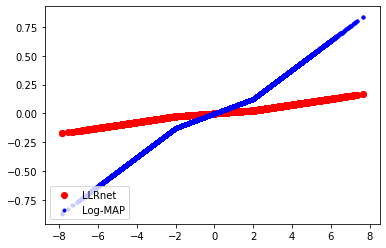

In [70]:
#bit0 Analysis
import matplotlib.pyplot as mpl
mpl.scatter(recSignal_test[:,0],LLR_pred[:,0],c='r',marker ="o",label = 'LLRnet')
mpl.scatter(recSignal_test[:,0],modelLLR_test[:,0],c='b',marker =".",label = 'Log-MAP')
mpl.legend(loc = 'lower left')
mpl.show()


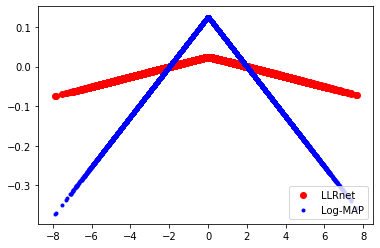

In [71]:
#bit1 Analysis
import matplotlib.pyplot as mpl
mpl.scatter(recSignal_test[:,0],LLR_pred[:,1],c='r',marker ="o",label = 'LLRnet')
mpl.scatter(recSignal_test[:,0],modelLLR_test[:,1],c='b',marker =".",label = 'Log-MAP')
mpl.legend(loc = 'lower right')
mpl.show()

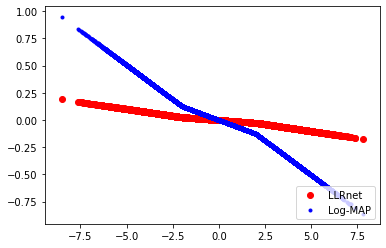

In [72]:
#bit1 Analysis
import matplotlib.pyplot as mpl
mpl.scatter(recSignal_test[:,1],LLR_pred[:,2],c='r',marker ="o",label = 'LLRnet')
mpl.scatter(recSignal_test[:,1],modelLLR_test[:,2],c='b',marker =".",label = 'Log-MAP')
mpl.legend(loc = 'lower right')
mpl.show()

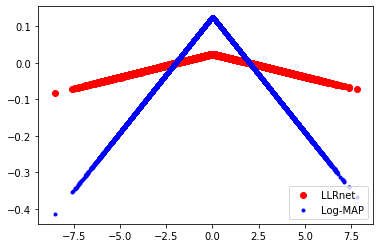

In [73]:
#bit1 Analysis
import matplotlib.pyplot as mpl
mpl.scatter(recSignal_test[:,1],LLR_pred[:,3],c='r',marker ="o",label = 'LLRnet')
mpl.scatter(recSignal_test[:,1],modelLLR_test[:,3],c='b',marker =".",label = 'Log-MAP')
mpl.legend(loc = 'lower right')
mpl.show()